In [20]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [21]:
data = pd.read_csv("M:/creditcardfraud/creditcard.csv")
print("length of training data",len(data))
print("length of normal data",len(data[data["Class"]==0]))
print("length of fraud  data",len(data[data["Class"]==1]))

length of training data 284807
length of normal data 284315
length of fraud  data 492


In [37]:
#DATA PREPARATION FOR CLASSIFIERS
def data_prepration(x): # preparing data for training and testing as we are going to use different data
    #again and again so make a function
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)

#Taking out the normal(training set) data and printing the length of data
data_train_X["Class"]= data_train_y["Class"] # combining class with original data
data_train = data_train_X.copy() # for naming conevntion
print("length of training data",len(data_train))
# Now make data set of normal transction from train data
normal_data = data_train[data_train["Class"]==0]
print("length of normal data in TRAINING DATA: ",len(normal_data))
fraud_data = data_train[data_train["Class"]==1]
print("length of fraud data in TRAINING DATA: ",len(fraud_data))

length of training data
199364
length of test data
85443
length of training data 199364
length of normal data in TRAINING DATA:  199030
length of fraud data in TRAINING DATA:  334


In [38]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    rcall = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
    print("recall inside",rcall)
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    return rcall

In [39]:

#for that we have to standrdize the normal amount and drop the time from it
data_test_X["Normalized Amount"] = StandardScaler().fit_transform(data_test_X['Amount'].reshape(-1, 1))
data_test_X.drop(["Amount"],axis=1,inplace=True)
data_test_X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount
80831,58674.0,-2.230608,0.124439,0.249738,0.550975,1.579199,-1.471185,-0.056041,0.398763,-0.937434,...,-0.145955,0.115037,-0.040765,-0.744308,-0.082192,0.246168,-0.489506,0.028346,-0.230317,-0.369178
233885,147742.0,1.905952,0.457625,-0.821034,3.609821,0.842123,0.886536,0.028328,0.110363,-1.006059,...,-0.195145,0.103436,0.446952,0.037859,0.298770,0.209640,0.068213,-0.030582,-0.056058,-0.336467
63548,50768.0,-1.525007,0.609911,1.773562,0.239279,-0.066184,-0.419671,0.150199,0.679649,-0.434021,...,-0.169148,-0.032836,-0.617580,-0.002550,-0.027560,0.202088,-0.658842,-0.075107,-0.058318,-0.173215
124952,77482.0,-0.671920,1.011022,0.949177,-0.123689,-0.225941,-0.384856,0.329317,0.463999,-0.835672,...,-0.095721,0.112424,0.086694,0.027097,-0.000847,-0.507301,0.153476,-0.026141,0.083601,-0.224178
195328,131002.0,-5.165474,4.351318,-2.344672,-1.856004,0.945071,4.173336,-3.360075,-11.433756,2.558376,...,-1.659072,11.049811,-3.894376,1.953338,-1.314106,-0.358366,0.336071,1.252588,0.256536,-0.344442


length of oversampled data is  255810
Number of normal transcation in oversampled data 199030
No.of fraud transcation 56780
Proportion of Normal data in oversampled data is  0.7780383878659943
Proportion of fraud data in oversampled data is  0.2219616121340057
length of training data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



199364
length of test data
85443
the recall for this model is : 0.810126582278
recall inside 0.810126582278
TP 128
TN 85282
FP 3
FN 30


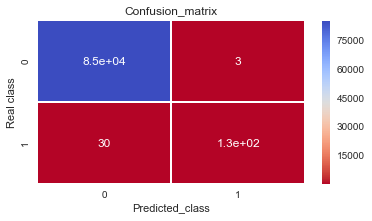


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.98      0.81      0.89       158

avg / total       1.00      1.00      1.00     85443

length of oversampled data is  289210
Number of normal transcation in oversampled data 199030
No.of fraud transcation 90180
Proportion of Normal data in oversampled data is  0.6881850558417759
Proportion of fraud data in oversampled data is  0.31181494415822414


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


length of training data
199364
length of test data
85443
the recall for this model is : 0.810126582278
recall inside 0.810126582278
TP 128
TN 85282
FP 3
FN 30


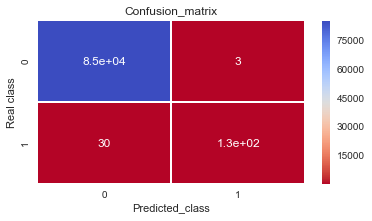


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.98      0.81      0.89       158

avg / total       1.00      1.00      1.00     85443

length of oversampled data is  322610
Number of normal transcation in oversampled data 199030
No.of fraud transcation 123580
Proportion of Normal data in oversampled data is  0.6169368587458541
Proportion of fraud data in oversampled data is  0.38306314125414587


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


length of training data
199364
length of test data
85443
the recall for this model is : 0.803797468354
recall inside 0.803797468354
TP 127
TN 85282
FP 3
FN 31


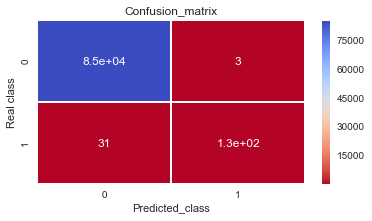


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.98      0.80      0.88       158

avg / total       1.00      1.00      1.00     85443

length of oversampled data is  356010
Number of normal transcation in oversampled data 199030
No.of fraud transcation 156980
Proportion of Normal data in oversampled data is  0.5590573298502851
Proportion of fraud data in oversampled data is  0.4409426701497149


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


length of training data
199364
length of test data
85443
the recall for this model is : 0.803797468354
recall inside 0.803797468354
TP 127
TN 85282
FP 3
FN 31


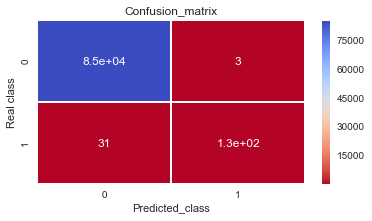


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.98      0.80      0.88       158

avg / total       1.00      1.00      1.00     85443

length of oversampled data is  389410
Number of normal transcation in oversampled data 199030
No.of fraud transcation 190380
Proportion of Normal data in oversampled data is  0.5111065458000565
Proportion of fraud data in oversampled data is  0.4888934541999435


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


length of training data
199364
length of test data
85443
the recall for this model is : 0.803797468354
recall inside 0.803797468354
TP 127
TN 85282
FP 3
FN 31


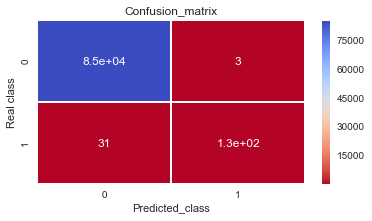


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.98      0.80      0.88       158

avg / total       1.00      1.00      1.00     85443



In [40]:
# OVERSAMPLING THE DATA:
points = 170
rcall_array=[]
prp_array=[]

for _ in range(0,5):

    for i in range(points):  # the number is choosen by myself on basis of nnumber of fraud transaction
        normal_data = normal_data.append(fraud_data)
      
    os_data = normal_data.copy()
    print("length of oversampled data is ", len(os_data))
    print("Number of normal transcation in oversampled data", len(os_data[os_data["Class"] == 0]))
    print("No.of fraud transcation", len(os_data[os_data["Class"] == 1]))
    print("Proportion of Normal data in oversampled data is ", len(os_data[os_data["Class"] == 0]) / len(os_data))
    print("Proportion of fraud data in oversampled data is ", len(os_data[os_data["Class"] == 1]) / len(os_data))
    prp_array.append((len(os_data[os_data["Class"] == 0]) / len(os_data))*100)
    os_data_X = os_data.ix[:, os_data.columns != "Class"]
    os_data_y = os_data.ix[:, os_data.columns == "Class"]
    os_train_X,os_test_X,os_train_y,os_test_y=data_prepration(data)
    clf= RandomForestClassifier(n_estimators=100)
    r=model(clf,os_data_X,data_test_X,os_data_y,data_test_y)
    
    rcall_array.append(r)
    points=100
    

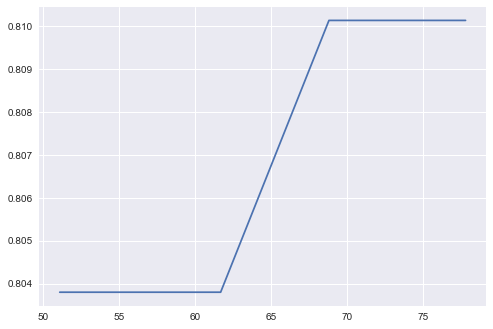

In [41]:
plt.plot(prp_array,rcall_array)
plt.show()